<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = 'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'

response = requests.get(url)

with open('names.txt', 'wb') as f:
  f.write(response.content)

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# stoi and itos
chars = sorted(list(set(''.join(words))))
stoi = {char:i+1 for i, char in enumerate(chars)}
stoi['.'] = 0
itos = {i:char for char, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [76]:
block_size = 5

In [77]:
# make dataset
def build_dataset(words):
  X, Y = [], []
  for w in words:
    #print(w)
    context = [0] * block_size # list of zeros of length block size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', itos[ix])
      context = context[1:] + [ix] # crop to remove previous, append new to end

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

X, Y = build_dataset(words)

torch.Size([182437, 5]) torch.Size([182437])
torch.Size([22781, 5]) torch.Size([22781])
torch.Size([22928, 5]) torch.Size([22928])
torch.Size([228146, 5]) torch.Size([228146])


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 5]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
# C should be a 27 x embedding dimension matrix
C = torch.randn((27, 2))

In [ ]:
C[stoi['a']]

tensor([ 1.4866, -0.0693])

In [ ]:
aonehot = F.one_hot(torch.tensor(stoi['a']), num_classes=27).float()
aonehot @ C

tensor([ 1.4866, -0.0693])

In [ ]:
C[[5, 6, 7]]

tensor([[ 0.2459,  1.4069],
        [-0.6024, -0.7465],
        [-0.3981,  0.2014]])

In [ ]:
C[torch.tensor([0,0,0])]

tensor([[-0.1456, -1.0500],
        [-0.1456, -1.0500],
        [-0.1456, -1.0500]])

In [ ]:
for data in X[:5]:
  enc = C[data]
  print(enc)

tensor([[-0.1456, -1.0500],
        [-0.1456, -1.0500],
        [-0.1456, -1.0500]])
tensor([[-0.1456, -1.0500],
        [-0.1456, -1.0500],
        [ 2.0222,  0.1123]])
tensor([[-0.1456, -1.0500],
        [ 2.0222,  0.1123],
        [ 0.1285, -0.1582]])
tensor([[ 2.0222,  0.1123],
        [ 0.1285, -0.1582],
        [-1.8410, -0.7647]])
tensor([[ 0.1285, -0.1582],
        [-1.8410, -0.7647],
        [ 0.2459,  1.4069]])


In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
%time
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.3 µs


torch.Size([228146, 6])

In [ ]:
%time
torch.flatten(emb, start_dim=1).shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


torch.Size([228146, 6])

In [ ]:
%time
torch.cat(torch.unbind(emb, 1), 1).shape

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


torch.Size([228146, 6])

Idk bruh I think mine is still better

In [ ]:
a = torch.arange(18)
a, a.shape

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 torch.Size([18]))

In [ ]:
a.view(3, 6) # holy moly where has this been all my life

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

2 microseconds bruv

In [8]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 5]), torch.Size([182625]))

In [78]:
emb_dim = 8

In [79]:
C = torch.randn((27, emb_dim))
w1 = torch.randn(block_size*emb_dim, 350)
b1 = torch.randn(350)
w2 = torch.randn(350, 27)
b2 = torch.randn(27)

parameters = [C, w1, b1, w2, b2]
for p in parameters:
  p.requires_grad = True


In [80]:
sum(p.nelement() for p in parameters)

24043

In [ ]:
lre = torch.linspace(-3, 0, 100000)
lrs = 10**lre


In [81]:
lri = []
lossi = []
stepi = []

In [89]:


for x in range(200000):

  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32, ))


  emb = C[Xtr[ix]]
  wi1 = emb.view(-1, block_size * emb_dim) @ w1
  wi1b = wi1 + b1
  wi1ba = wi1b.tanh()
  wi2 = wi1ba @ w2
  logits = wi2 + b2



  for p in parameters:
    p.grad = None

  loss = F.cross_entropy(logits, Ytr[ix])

  if x % 5000 == 0:
    print(loss.log10().item())
  loss.backward()
  lr = 0.1 if x < 100000 else 0.01 if 100000 < x < 150000 else 0.005
  for p in parameters:
    p.data += -lr * p.grad

  stepi.append(x)
  lossi.append(loss.log10().item())


print(loss.log10().item())

0.3348410725593567
0.641850471496582
0.533799946308136
0.6608113646507263
0.5076515674591064
0.536157488822937
0.5822692513465881
0.5800274014472961
0.49809983372688293
0.5171781182289124
0.55166095495224
0.46659258008003235
0.5512898564338684
0.4869915246963501
0.5595821142196655
0.4861084818840027
0.49669015407562256
0.5035687685012817
0.44831371307373047
0.5566456913948059
0.4611642062664032
0.31625285744667053
0.3110734522342682
0.3396821916103363
0.3181627690792084
0.41787415742874146
0.372101753950119
0.297235369682312
0.25224199891090393
0.2767580449581146
0.28788110613822937
0.3068072497844696
0.31519025564193726
0.35038837790489197
0.3594944179058075
0.34218472242355347
0.2825157642364502
0.30589866638183594
0.27842503786087036
0.26006951928138733
0.27133607864379883


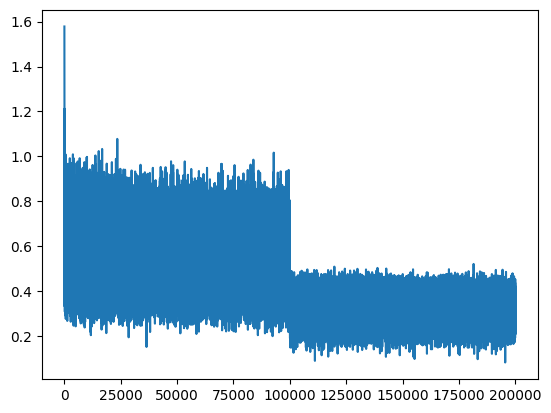

In [90]:
plt.plot(stepi, lossi)

In [91]:
emb = C[Xdev]
wi1 = emb.view(-1, block_size*emb_dim) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.1686513423919678

In [92]:
emb = C[Xte]
wi1 = emb.view(-1, block_size*emb_dim) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Yte)
loss.item()

2.165229082107544

In [93]:
emb = C[Xtr]
wi1 = emb.view(-1, block_size*emb_dim) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.109489917755127

In [94]:
def prompt(cx, max_length=15, samples=1):
  for x in range(samples):
    out = [stoi[c] for c in cx]

    if len(cx) > block_size:
      cx = cx[-block_size:]
    context = [0]*(block_size - len(cx)) + out
    while True:

      emb = C[torch.tensor([context])]
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    print(''.join(itos[i] for i in out))

prompt("bro", samples=10)

brolir.
brormono.
broodlyn.
brora.
brojeleesina.
brode.
broryn.
broxy.
broshen.
broya.


In [95]:
prompt("z", samples=10)

zeera.
zielanie.
zesra.
zilayyah.
zeanna.
zagon.
zasariah.
zenner.
zaeaya.
zhepa.


In [96]:
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ w1 + b1)
    logits = h @ w2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

zanachons.
aylani.
alanie.
khaus.
kandalina.
ladg.
sayling.
ville.
amella.
mahebrumog.
yuggitha.
syla.
naivin.
yazano.
carpackier.
jouztaston.
niyanna.
xyli.
sumon.
sadleigh.


In [97]:
prompt('z', samples=10)
print('\n')
prompt('w', samples=10)

zyniel.
zaite.
zaylo.
zialla.
zazinu.
zalyana.
zaluballopa.
zaveer.
zuvima.
zaigy.


woxari.
wister.
wspan.
waheerumuwarm.
wynnelle.
waysha.
waaleiza.
wayei.
windre.
wynna.


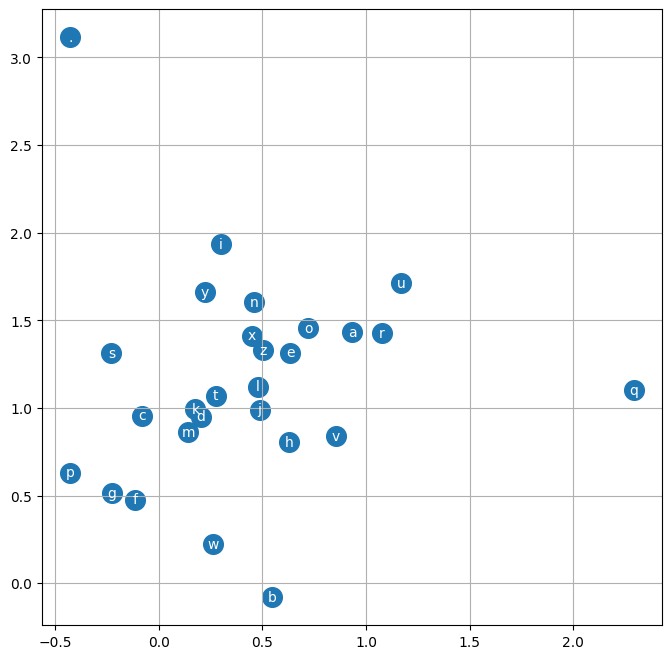

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

thought it was overfitting for a second there

In [ ]:
torch.randint(0, X.shape[0], (32,))

tensor([179611, 119358, 186702,  21302, 129897,  96168,  87990, 154105, 174378,
        129397, 188138, 186027, 210454,  73601, 191668, 157278,  51361, 228138,
        129548, 215429,  12357, 185098, 200768, 195677,  39548,  31307, 129128,
        216988, 163714, 152336, 164222, 197012])

In [ ]:
# train, val, test split
# 80%, 10%, 10%
